# Neurodynamics - Homework 01: The Hodgkin-Huxley Model

:Group: Katarzyna Olszynska (1000023) & Benjamin Peters (982981)

## Imports

In [ ]:
!pip install brian2

In [ ]:
import brian2 as b2
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Model definition and simulation

In [ ]:
b2.start_scope()

def simulate_hhx(time_span, input_current):
  """
  This function describes the simulation of neural spiking behaviour according to the Hodgkin-Huxley model.

  time_span -- denotes the length of the simulation
  input_current -- an input of type TimedArray() containing the input currents
  """

  # model parameters
  C = 1*b2.uF
  g_K = 36*b2.msiemens
  g_Na = 120*b2.msiemens
  g_L = 0.3*b2.msiemens
  E_K = -12*b2.mV
  E_Na = 120*b2.mV
  E_L = 10.6*b2.mV

  # define the differential equations for the Hodgkin-Huxley model
  eqs = """
  dv/dt = (I - g_Na*m**3*h*(v-E_Na) - g_K*n**4*(v-E_K) - g_L*(v-E_L)) / C : volt

  dm/dt = alpha_m * (1-m) - beta_m * m : 1
  dn/dt = alpha_n * (1-n) - beta_n * n : 1
  dh/dt = alpha_h * (1-h) - beta_h * h : 1

  alpha_m = (0.1/mV) * (-v+25*mV)/(exp((-v+25*mV)/(10*mV))-1)/ms : Hz
  beta_m = 4 * exp(-v/(18*mV))/ms : Hz

  alpha_h = 0.07 * exp(-v/(20*mV))/ms : Hz
  beta_h = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz

  alpha_n = (0.01/mV) * (10*mV-v)/(exp((-v+10*mV)/(10*mV))-1)/ms : Hz
  beta_n = 0.125*exp(-v/(80*mV))/ms : Hz

  I = input_current(t) : amp
  """

  # set initial conditions and create a brian2 NeuronGroup with the Hodgkin-Huxley model
  neuron = b2.NeuronGroup(1, model = eqs , method='exponential_euler')
  neuron.v = 0 * b2.mV
  neuron.m = 0.052
  neuron.n = 0.32
  neuron.h = 0.596

  # define a brian2 monitor to record the membrane potential of the neuron
  stm = b2.StateMonitor(neuron, ['v', 'm', 'n', 'h', 'I'], record=True)

  # run a simulation with a constant input current for a given time span
  b2.run(time_span)

  return stm

In [ ]:
# Simulate the HH model for 30 ms with input current of 7.2 uA
b2.start_scope()
time_span = 30 * b2.ms

input_current = 7.2*b2.uA*np.ones(30)
input_current = b2.TimedArray(input_current, dt=1*b2.ms)
stm = simulate_hhx(time_span, input_current)

## Question 2: Plotting the simulation results

In [ ]:
def plot_results(st_mon, time_span):
  """
  This function plots the results after running the Hodgkin-Huxley model simulation.

  Parameters:
  st_mon -- the StateMonitor object that containts the measurements of the state variables
  time_span -- the time span covered in the simulation
  """
  fig, axes = plt.subplots(nrows=3, figsize=(10, 5))

  axes[0].plot(st_mon.t/b2.ms, st_mon.v[0]/b2.mV)
  axes[0].axhline(y=0, color='black', linestyle='dashed')
  axes[0].set(ylabel='V [mV]', xlim=[0, time_span], ylim=[-15, 100])

  axes[1].plot(st_mon.t/b2.ms, st_mon.m[0], label='m')
  axes[1].plot(st_mon.t/b2.ms, st_mon.n[0], label='n')
  axes[1].plot(st_mon.t/b2.ms, st_mon.h[0], label='h')
  axes[1].set(ylabel='Gating variables', xlim=[0, time_span], ylim=[0, 1])
  axes[1].legend(loc="upper right")

  axes[2].plot(st_mon.t/b2.ms, st_mon.I[0]/b2.uamp)
  axes[2].set(ylabel='I [μA]', xlim=[0, time_span], ylim=[0, 12.5])

  fig.tight_layout()

  plt.show()

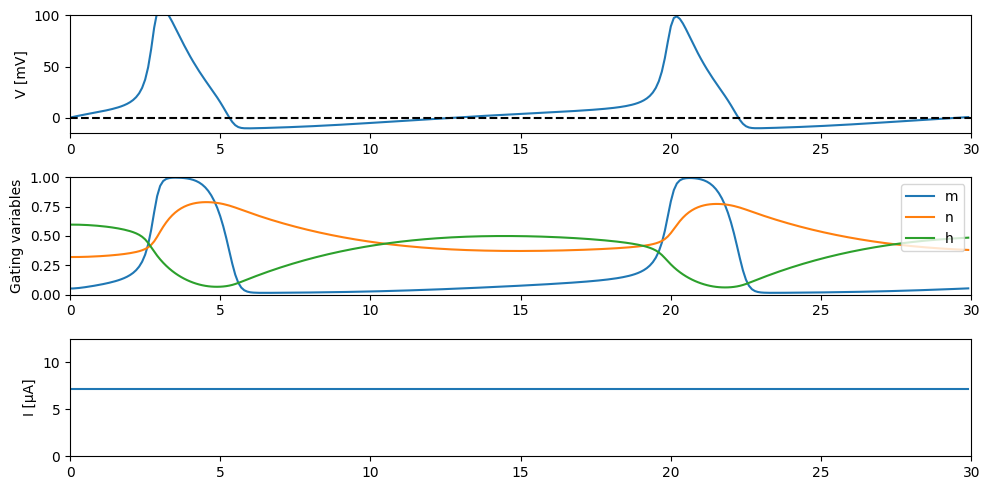

In [ ]:
plot_results(stm, 30)

## Question 3: Applying a step current

In [ ]:
b2.start_scope()

time_frame = 70

def simulate_hhx_step_current(input_current):
  """
  This function conducts the model simulation using a step current.

  Parameter:
  input_current -- denotes the size of the applied current
  """
  # create step current array
  t_start = 10
  t_end = 50
  timing_array = np.zeros(time_frame) * b2.uA
  timing_array[t_start:t_end] = input_current
  step_current = b2.TimedArray(timing_array, dt = 1*b2.ms)

  # run the simulation involving the step current
  stm = simulate_hhx(time_frame*b2.ms, step_current)

  return stm

**What is the lowest current you can apply so
that the neuron emits at least one spike?**

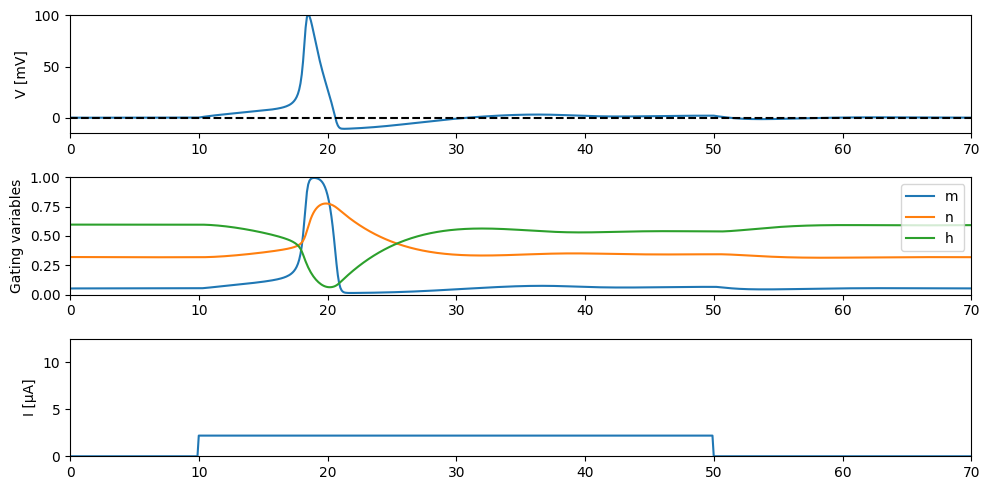

In [ ]:
# use the lowest possible step current that causes one spike
b2.start_scope()

stm_one_spike = simulate_hhx_step_current(2.2*b2.uA)

plot_results(stm_one_spike, time_frame)

At 2.2 $\mu A$, the neuron is able to emit one spike. Below that threshold, it does not fire (see below).

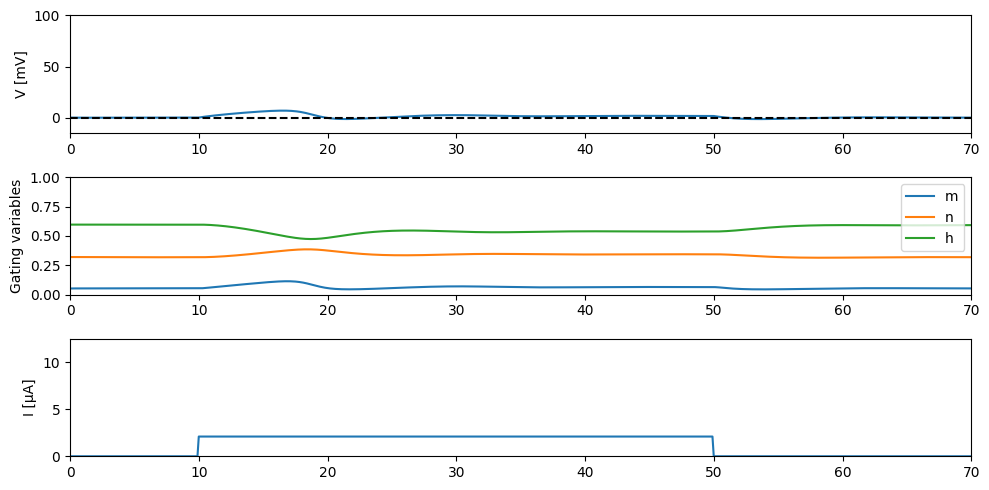

In [ ]:
# show model behaviour when neuron does not fire
b2.start_scope()

stm_no_spike = simulate_hhx_step_current(2.1*b2.uA)

plot_results(stm_no_spike, time_frame)

**What is the lowest current you can apply so that the neuron
fires repetitively?**

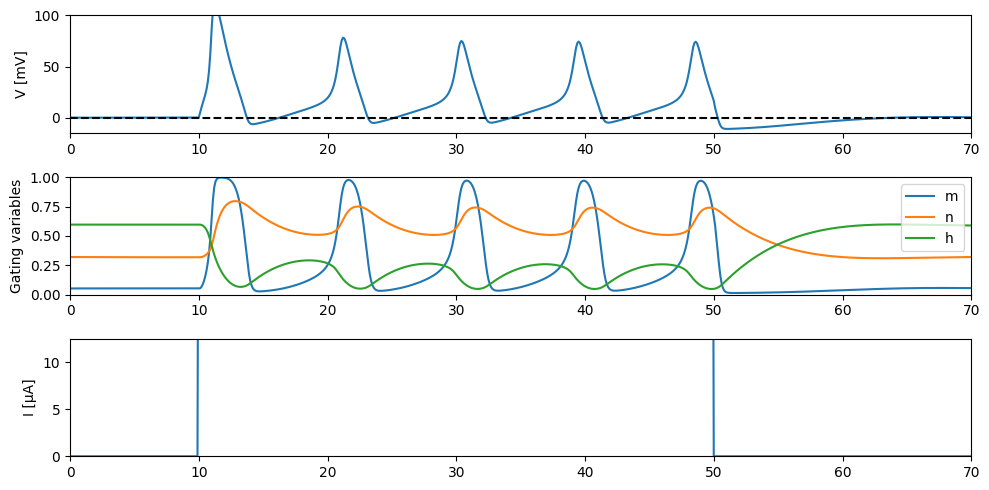

In [ ]:
# find out when neuron starts to fire repetitively using the Hodgkin-Huxley model
b2.start_scope()

stm_repetitive_spikes = simulate_hhx_step_current(50.0*b2.uA)

plot_results(stm_repetitive_spikes, time_frame)

Starting at 5.1 $\mu A$, the neuron fires at least twice. Applying a step current of 5.8 $\mu A$ causes the neuron the fire three times. Using a higher input current of ca. 50 $\mu A$ makes the neuron even more often (see above).

**Using your plots of the simulation, characterize the difference between the repetitive
and non-repetitive firing regimes.**

The difference between the repetitive and non-repetitive firing regimes lies in the presence or absence of cyclic behaviour of the gating variables $m$, $n$, and $h$, respectively, after the first spike occurs. In case of a non-repetitive firing regime, this does not occur. Instead, the values of the gating variables rebound to the values they had at the beginning of the simulation.

## Question 4: Applying a ramp current

In [ ]:
b2.start_scope()

def simulate_hhx_ramp_current(t_duration, max_current):
  """
  This function conducts the model simulation using a ramp current.

  Parameter:
  t_duration -- denotes how long the ramp current will increase linearly
  max_current -- denotes the size of the maximally applied current
  """
  # create ramp current array
  zeros_array = np.zeros(10) *b2.uA
  ramp_current_array = np.linspace(0, max_current, t_duration+1)
  ramp_current = np.concatenate((zeros_array, ramp_current_array, zeros_array)) * b2.uA
  ramp_current = b2.TimedArray(ramp_current, dt = 1*b2.ms)

  # run the simulation involving the ramp current
  stm = simulate_hhx(time_frame*b2.ms, ramp_current)

  return stm

**Find the shortest $t_{duration}$ such that the
neuron does not spike by starting at $t_{duration}$ = 60ms and lowering the duration. Record the Voltage at
$t_{0}$ + $t_{long}$.**

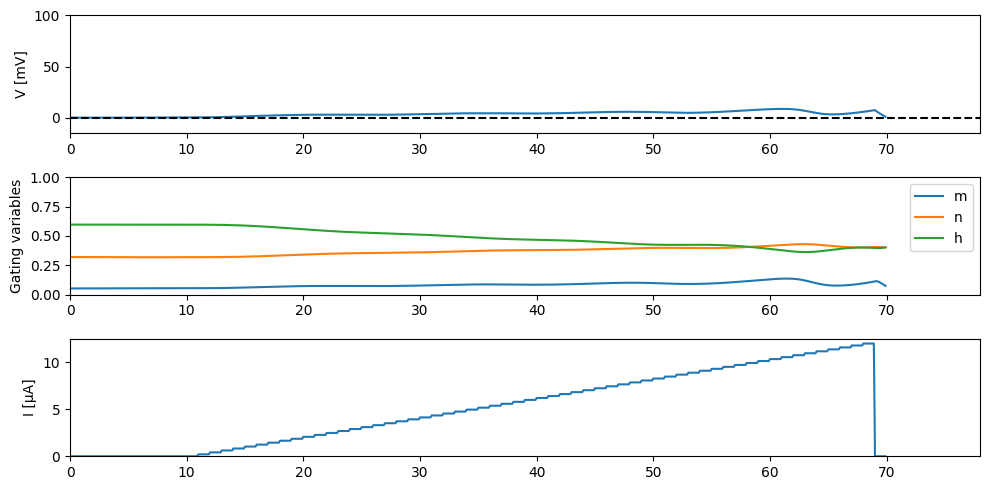

In [ ]:
b2.start_scope()

duration_1 = 58
time_frame_1 = 20 + duration_1

stm_ramp_current_1 = simulate_hhx_ramp_current(duration_1, 12.0)

plot_results(stm_ramp_current_1, time_frame_1)

In [ ]:
stm_ramp_current_1.v[0][10+duration_1]

33.89620544 * uvolt

We find that a ramp current lasting 58 milliseconds will not lead to spiking behaviour.

**Next, increase the current to only 4.5 $\mu A$ and find the shortest duration $t_{short}$ such that the neuron does
spike in the analogous way.**

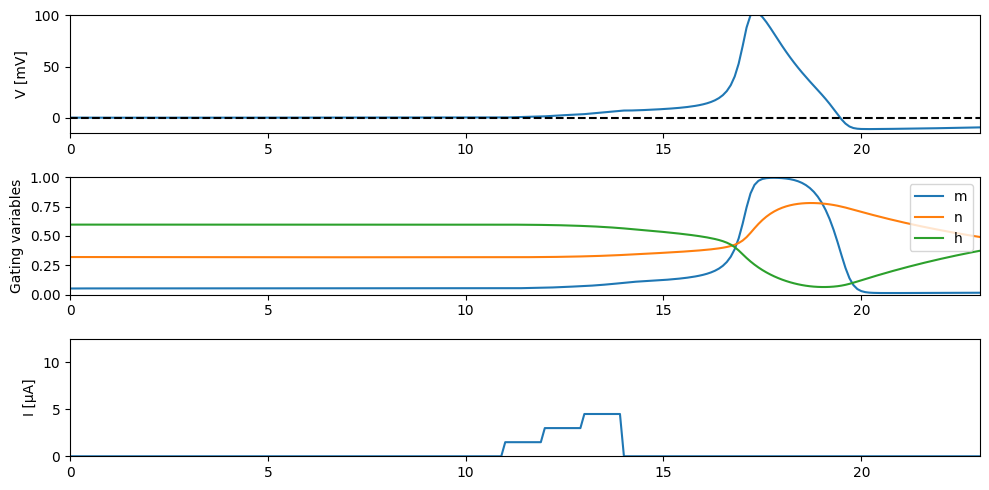

In [ ]:
b2.start_scope()

duration_2 = 3
time_frame_2 = 20 + duration_2

stm_ramp_current_2 = simulate_hhx_ramp_current(duration_2, 4.5)

plot_results(stm_ramp_current_2, time_frame_2)

In [ ]:
stm_ramp_current_2.v[0][10+duration_2]

-72.94853084 * uvolt

In our simulation, the shortest time period that is necessary to cause a spike using a ramp current is 3 milliseconds.

**Plot not only the voltage, but also the three gating variables $m$, $n$, $p$ and link the difference in the spiking
threshold to their dynamics.**

When the neuron fires, we see a fast increase of the $m$ variable which denotes the activation of the sodium channel, while its inactivation variable $h$ decreases. Likewise, the potassium channels are opened.

In contrast, when the neuron does not fire, the $m$ and $n$ variables see little to no increase, while the $h$ variable does not significantly decline. Therefore, there is no crucial change in the membrane voltage which would exhibit a spike.